## Final Project Submission
Please fill out:

* Student name: Guofa Shou
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name:
* Blog post URL:

# Business Understanding
I firstly do the business understanding by the following questions and answers

In [171]:
# Q: Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
# A: The stakeholder is the SyriaTel, a telecommunications company. 
# Q: What business problem(s) will this Data Science project solve for the organization?
# A: 1) Who will be stick on the company and who will stop doing business with the company based on data analysis
#       and classification models performed.
#    2) Based on identified patterns, suggestions in different aspects could be given to the company for keeping 
#       the customers stick on the company
# Q: What data sources are available to us?
# A: the file bigml_59c28831336c6604c800002a.csv includes information for different customers

# Data Understanding
Now, I import the data and examine what data are available.

In [172]:
# Import necessary basic libraries
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [173]:
# load data into dataframe
df = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')
# take a look the first 5 rows to get an idea about the data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [174]:
# What data is available and is there any missing values in any columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### There are 20 features and one target, i.e., churn, and no missing data from all columns

# Data Preparation 

In [175]:
# Deal with column names:
# since there are spaces in the column names, I want to repalce it with '_' for better naming
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [176]:
# Deal with phone number: drop it since it generally does not affect the customer churn
len(df['phone_number'].unique())
# all phone_number are unique
df = df.drop('phone_number',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [177]:
# Deal with 'state','international_plan' and 'voice_mail_plan':
objcols = ['state','international_plan','voice_mail_plan']
for i,col in enumerate(objcols):
    print(f"Unique values in {col}:  {df[col].unique()} \n")
    
# For international_plan and voice_mail_plan, convert 'yes' and 'no' into 1 and 0 for 
df['international_plan'].replace(('yes', 'no'), (1, 0), inplace = True)
df['voice_mail_plan'].replace(('yes', 'no'), (1, 0), inplace = True)

# for 'state', use onehotencoder late since it has multiple values
for i,col in enumerate(objcols):
    print(f"Unique values in {col}:  {df[col].unique()} \n")

Unique values in state:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

Unique values in international_plan:  ['no' 'yes'] 

Unique values in voice_mail_plan:  ['yes' 'no'] 

Unique values in state:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

Unique values in international_plan:  [0 1] 

Unique values in voice_mail_plan:  [1 0] 



In [178]:
# Deal with 'churn': convert boolean into int
df['churn'] = df['churn'].astype(int)
df.churn.value_counts()
# it is imbalanced, might use SMOTE for imbalanced data

0    2850
1     483
Name: churn, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

### now all data except state are in good format

# Feature examination
 examine every features

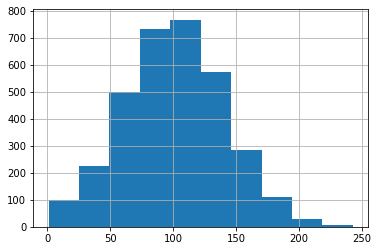

In [180]:
# 'account_length'
df['account_length'].hist()
plt.savefig('figures/accountlen_hist.png')
# account_length is discrete values and follow a normal distribution, and it is more like the days

In [181]:
# The area_code
print(f"Unique values in area_code:  {df['area_code'].unique()} \n")
# it has three unique values in area_code, 
# it is interesting to see whether the churn rate is similar or not across three area_code
print(df.groupby(["area_code"])['churn'].mean())
# It seems the churn rates are similar across three area codes, therefore, this feature can be excluded from classification

Unique values in area_code:  [415 408 510] 

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


In [182]:
# The state: to see whether different states have different churn rate
churn_rate_state = pd.DataFrame(df.groupby(["state"])['churn'].mean().sort_values(ascending = False))
print(churn_rate_state)


          churn
state          
CA     0.264706
NJ     0.264706
TX     0.250000
MD     0.242857
SC     0.233333
MI     0.219178
MS     0.215385
NV     0.212121
WA     0.212121
ME     0.209677
MT     0.205882
AR     0.200000
KS     0.185714
NY     0.180723
MN     0.178571
PA     0.177778
MA     0.169231
CT     0.162162
NC     0.161765
NH     0.160714
GA     0.148148
DE     0.147541
OK     0.147541
OR     0.141026
UT     0.138889
CO     0.136364
KY     0.135593
SD     0.133333
OH     0.128205
FL     0.126984
IN     0.126761
ID     0.123288
WY     0.116883
MO     0.111111
VT     0.109589
AL     0.100000
ND     0.096774
NM     0.096774
WV     0.094340
TN     0.094340
DC     0.092593
RI     0.092308
WI     0.089744
IL     0.086207
NE     0.081967
LA     0.078431
IA     0.068182
VA     0.064935
AZ     0.062500
AK     0.057692
HI     0.056604


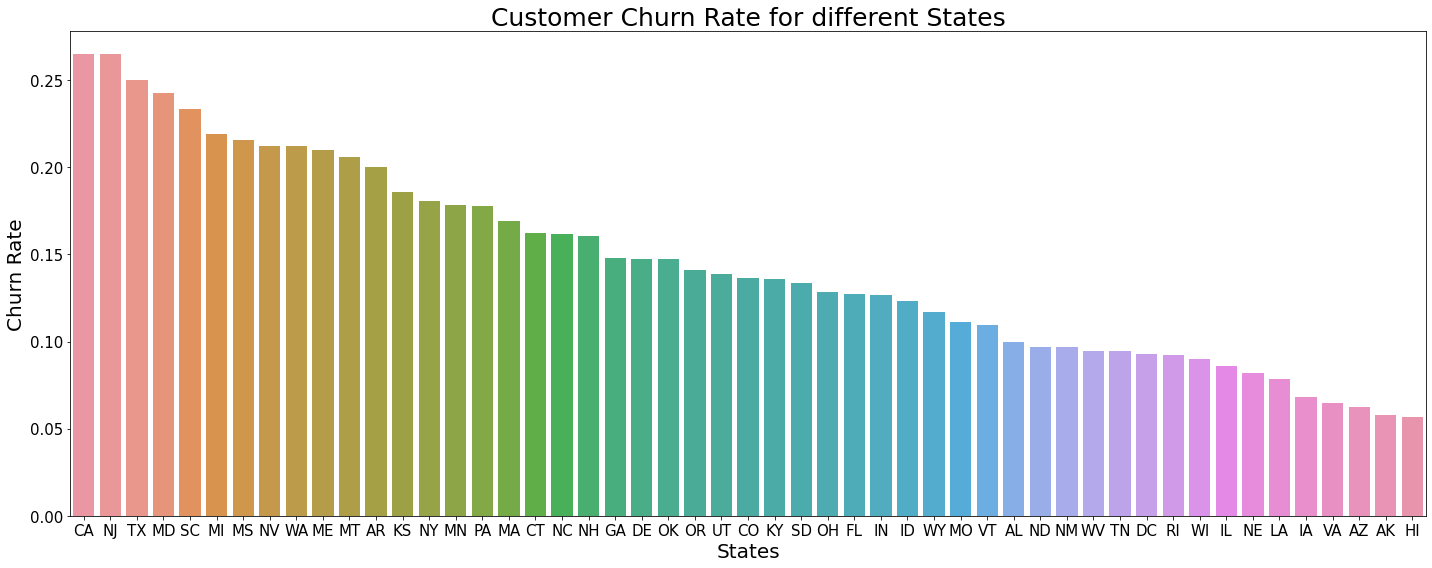

In [183]:
# visualization it since it have many states
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x = np.linspace(0, len(churn_rate_state)-1, len(churn_rate_state), endpoint=True),
            y = 'churn', data = churn_rate_state , ax = ax)
plt.title('Customer Churn Rate for different States', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Churn Rate', fontsize = 20)
ax.set_xticklabels(churn_rate_state.index)
plt.tight_layout()
plt.savefig('figures/churnrate_states.png')
# Different states have different churn rate, CA and NJ are the two highest churn rate states > 25%,
# while AK and HI are the two lowest churn rate states < 6%

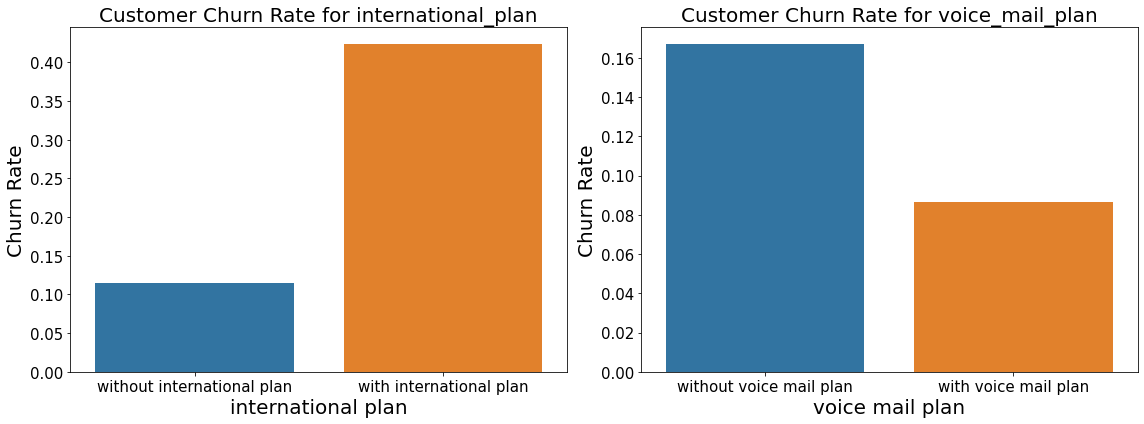

In [184]:
# international_plan and voice_mail_plan:
# whether the different conditions in these two have different churn rates?
churn_rate_interplan = pd.DataFrame(df.groupby(["international_plan"])['churn'].mean())
churn_rate_voiceplan = pd.DataFrame(df.groupby(["voice_mail_plan"])['churn'].mean())
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.barplot(x = [0,1], y = 'churn', data = churn_rate_interplan, ax = ax[0])
ax[0].set_title('Customer Churn Rate for international_plan', fontsize = 20)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].set_xlabel('international plan', fontsize = 20)
ax[0].set_ylabel('Churn Rate', fontsize = 20,)
ax[0].set_xticklabels(['without international plan','with international plan'])

sns.barplot(x = [0,1], y = 'churn', data = churn_rate_voiceplan, ax = ax[1])
ax[1].set_title('Customer Churn Rate for voice_mail_plan', fontsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].set_xlabel('voice mail plan', fontsize = 20)
ax[1].set_ylabel('Churn Rate', fontsize = 20)
ax[1].set_xticklabels(['without voice mail plan','with voice mail plan'])
plt.tight_layout()
plt.savefig('figures/churnrate_intervoiceplans.png')
# The customer with international plan has a higher churn rate
# The customer with voice mail plan has a lower churn rate

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number_vmail_messages, dtype: int64


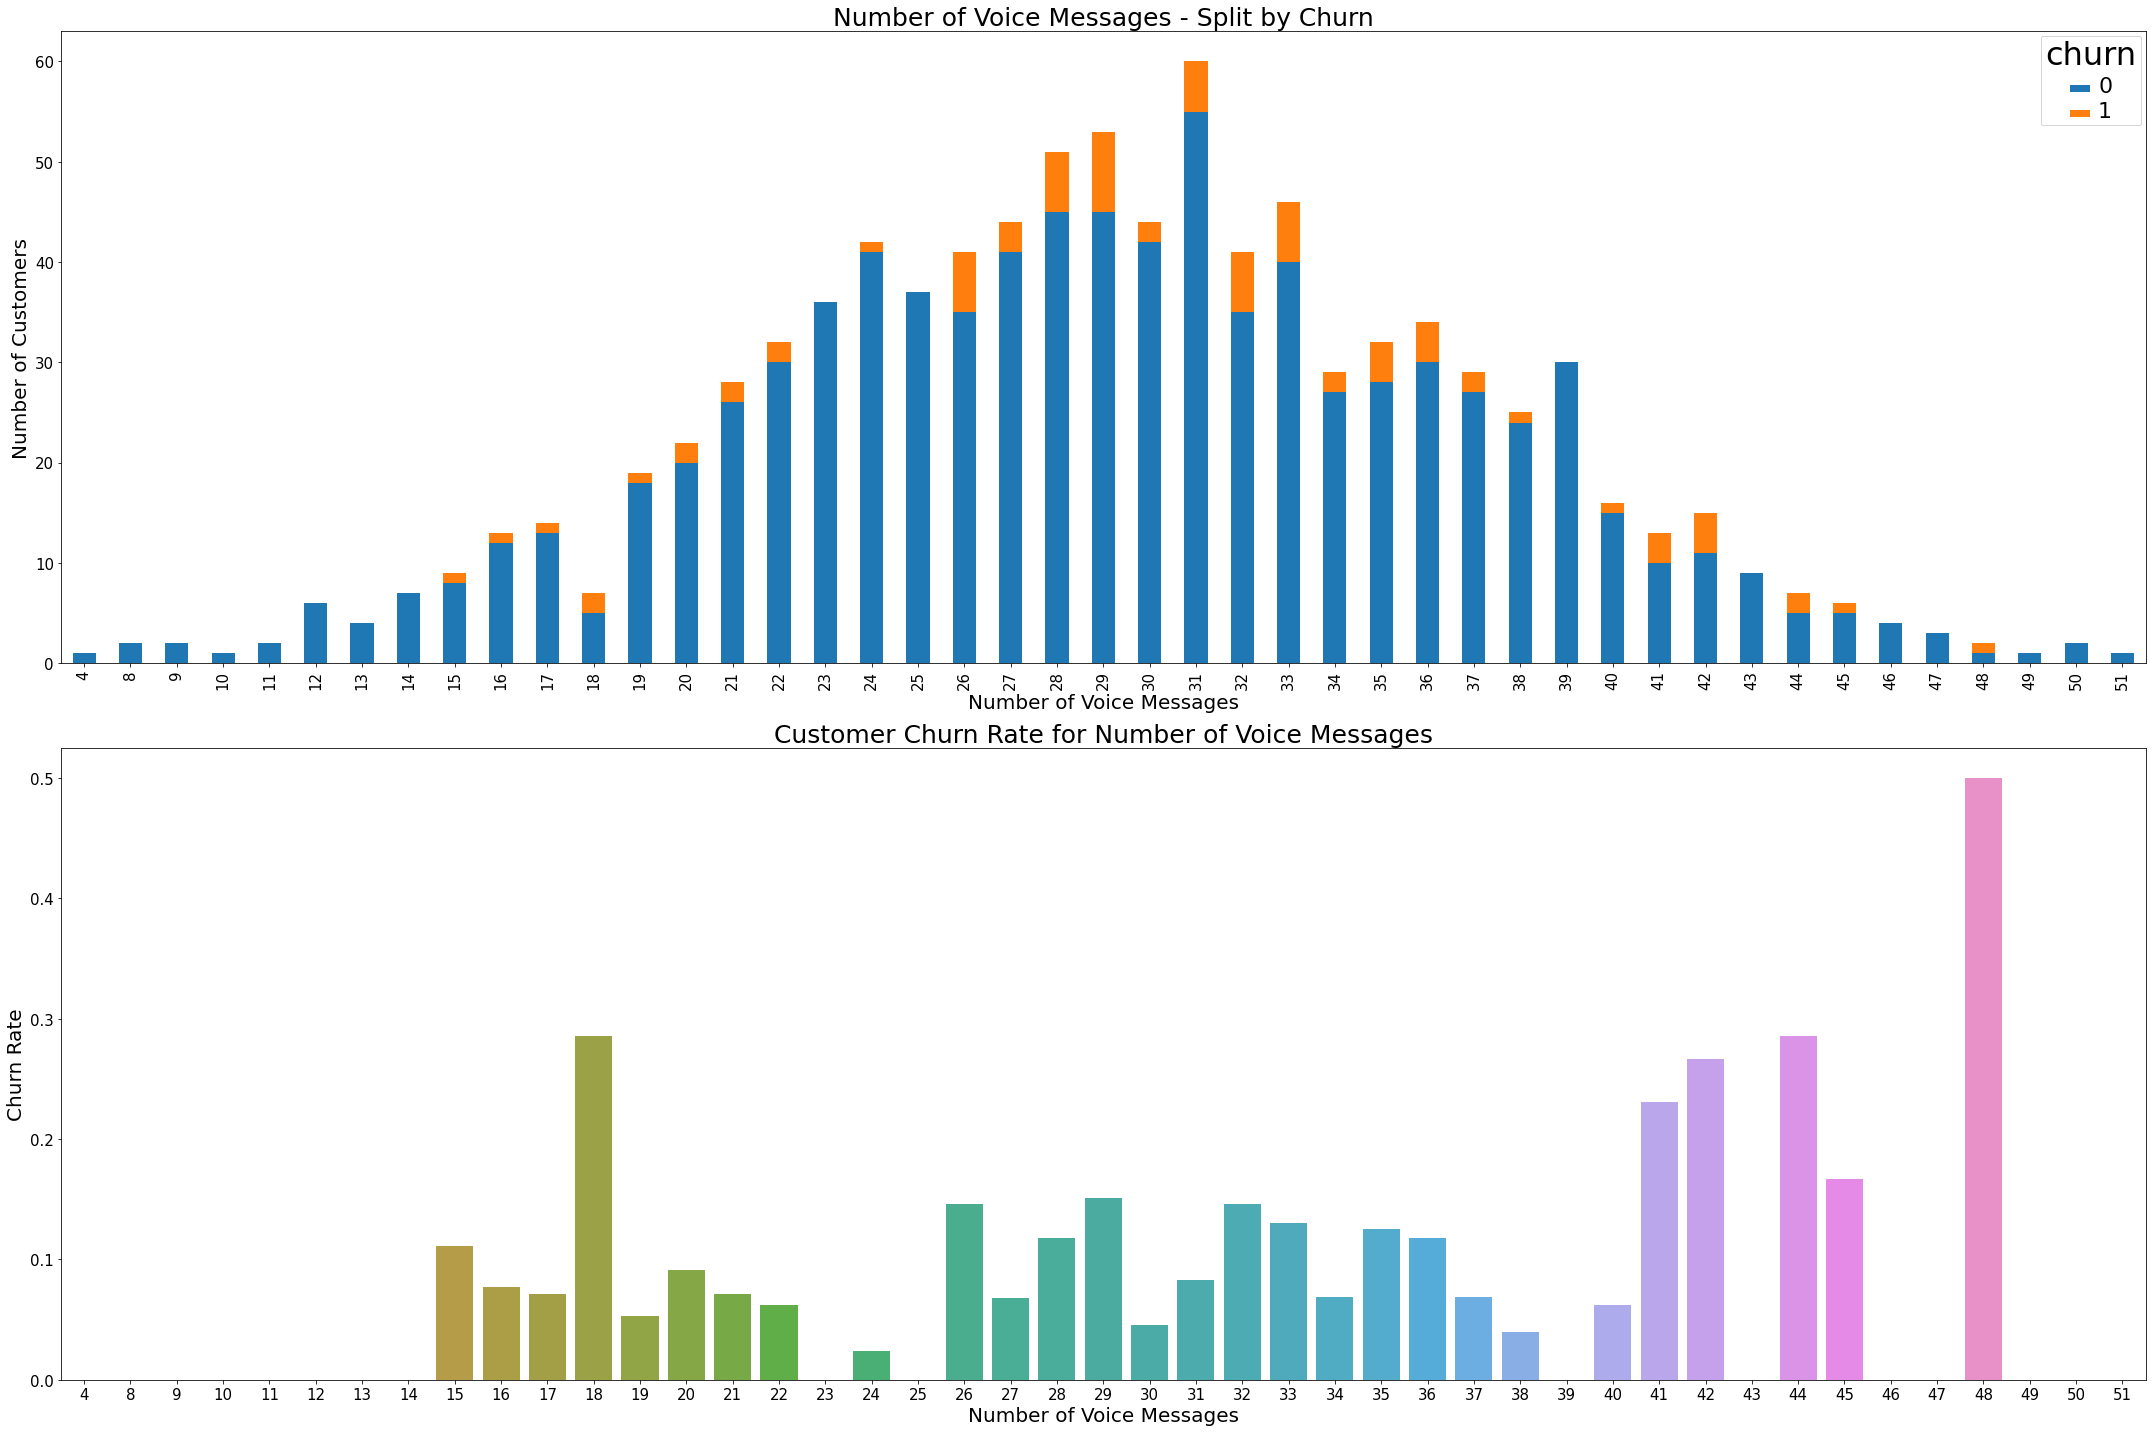

<Figure size 432x288 with 0 Axes>

In [185]:
# number_vmail_messages:
print(df['number_vmail_messages'].value_counts())
# there is a larger number of customers with 0 number of voice messages
# I will drop the rows == 0 and only examine the customers with number of voice messages
df_nonzero = df[df['number_vmail_messages']>0]

fig, ax = plt.subplots(2,1,figsize = (30, 20))
# how many customers with churn=1 or 1 with respect to different number of voice messages
df_nonzero.groupby(['number_vmail_messages', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax[0]);
ax[0].set_title('Number of Voice Messages - Split by Churn', fontsize = 25)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].set_xlabel('Number of Voice Messages', fontsize = 20)
ax[0].set_ylabel('Number of Customers', fontsize = 20)
plt.setp(ax[0].get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax[0].get_legend().get_title(), fontsize='32') # for legend title

# The churn rate for the customers with different number of voice messages
churn_rate_nvmail = pd.DataFrame(df_nonzero.groupby(["number_vmail_messages"])['churn'].mean())
sns.barplot(x = np.linspace(0, len(churn_rate_nvmail)-1, len(churn_rate_nvmail), endpoint=True), 
            y = 'churn', data = churn_rate_nvmail , ax = ax[1])
ax[1].set_title('Customer Churn Rate for Number of Voice Messages', fontsize = 25)
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].set_xlabel('Number of Voice Messages', fontsize = 20)
ax[1].set_ylabel('Churn Rate', fontsize = 20)
ax[1].set_xticklabels(churn_rate_nvmail.index)
plt.tight_layout()
plt.show()
plt.savefig('figures/churnrate_numvmailmges.png')
# This feature seems not well sampled, since there are too many customers in the survey has 0 number of voice messages.
# Meanwhile, this feature also have some relationship with the churn rate

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64


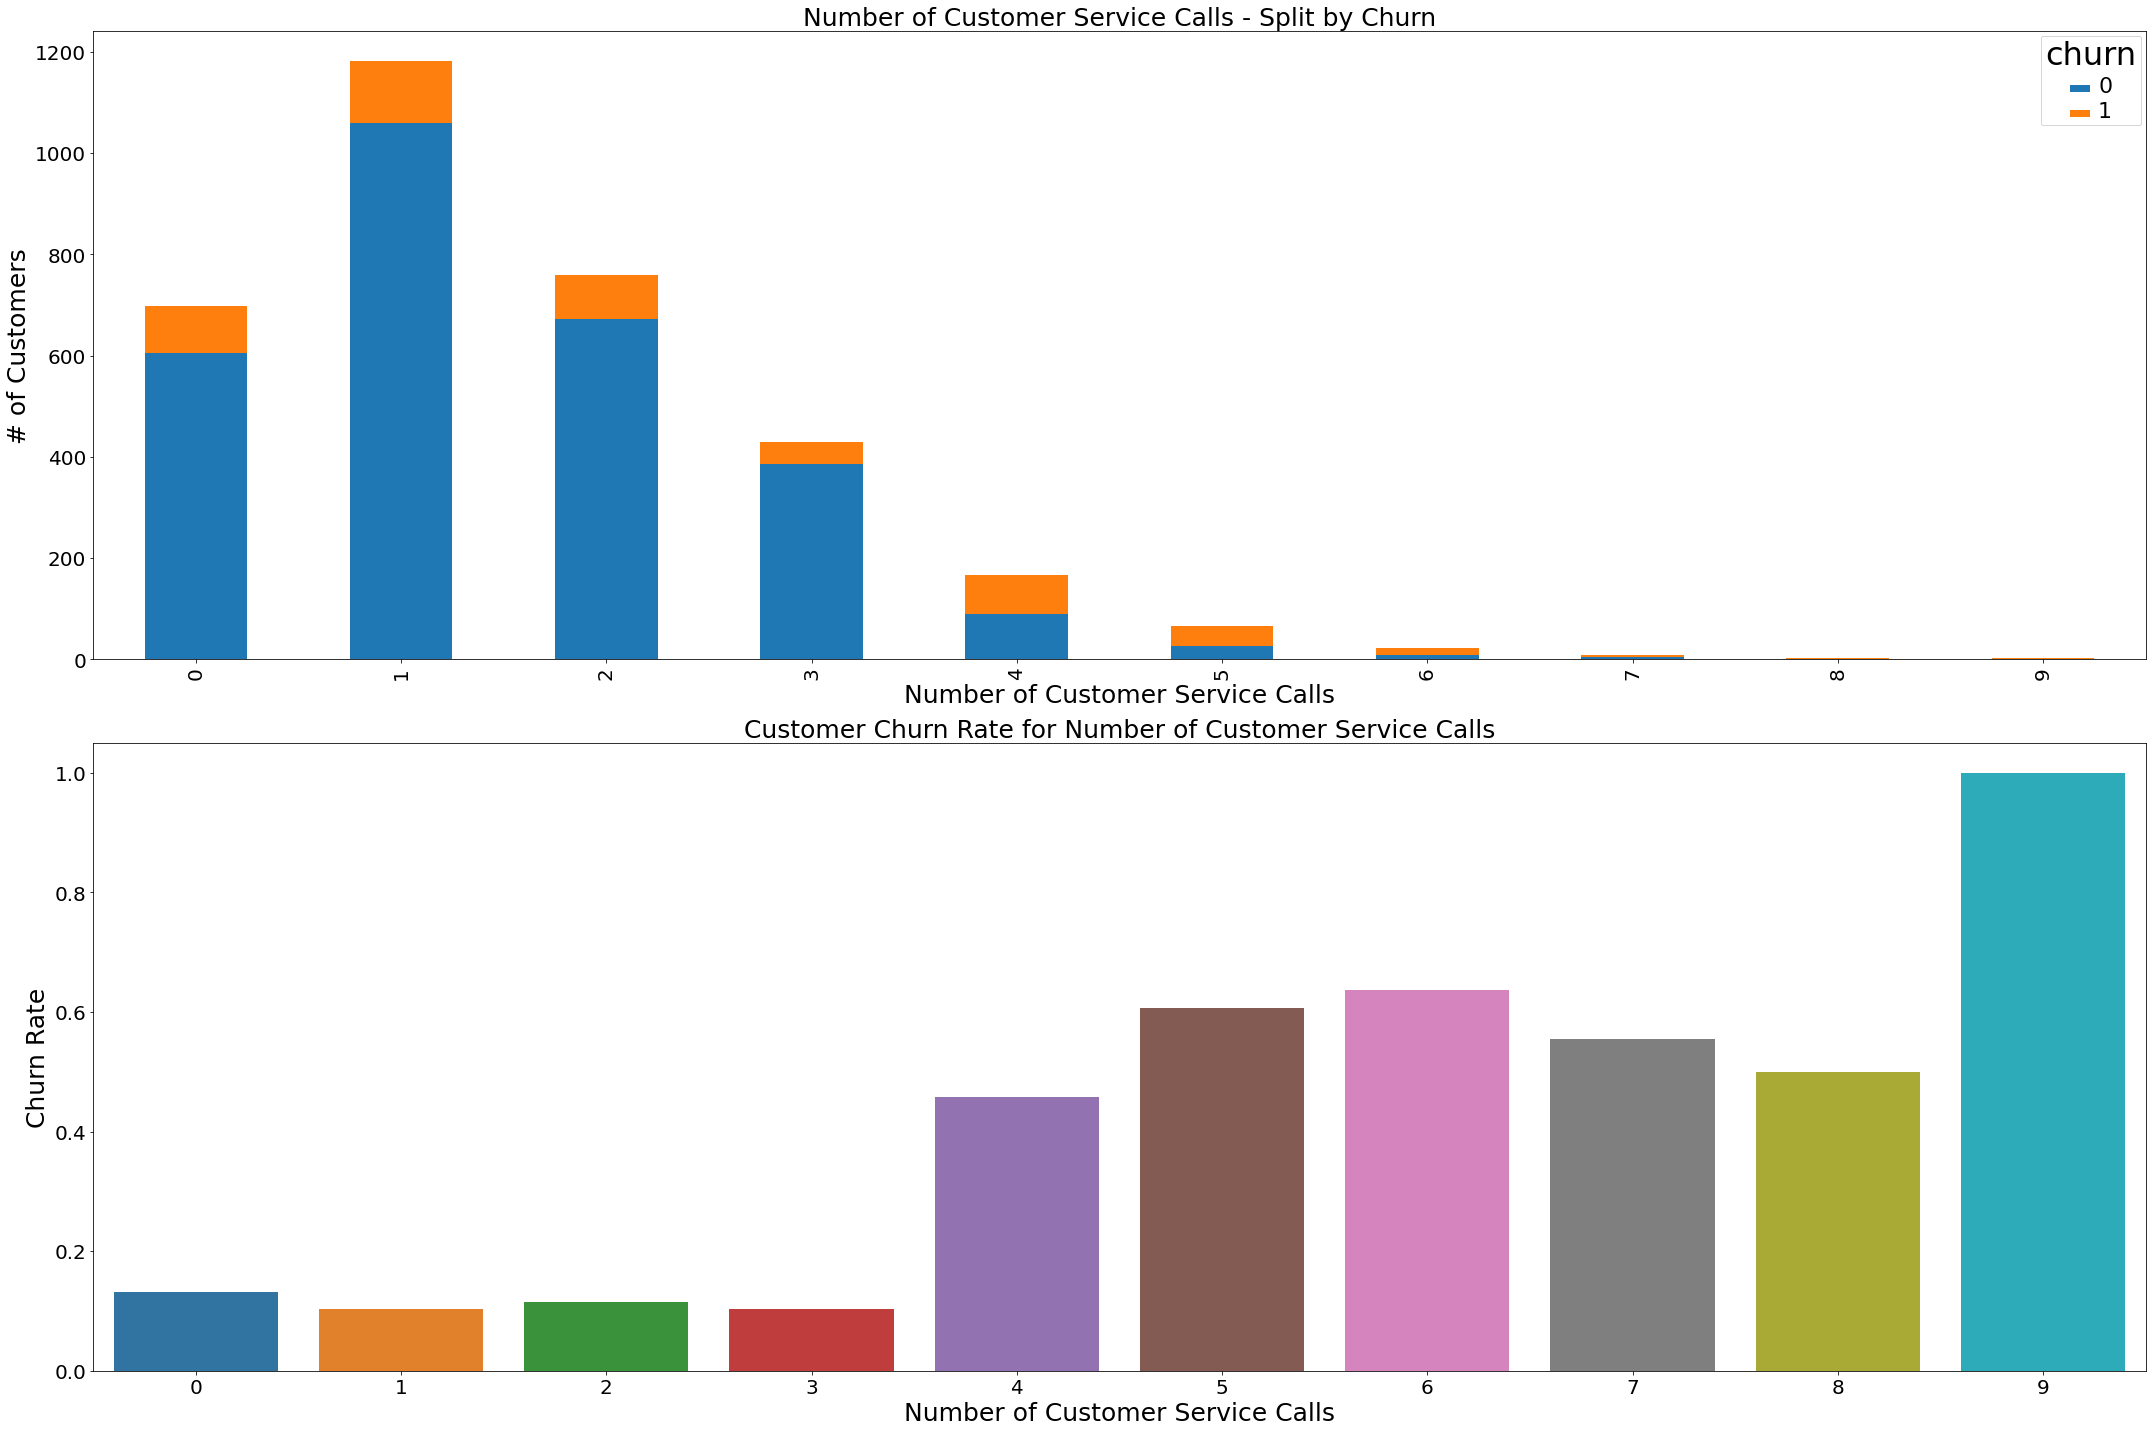

<Figure size 432x288 with 0 Axes>

In [186]:
# customer_service_calls: do the same plot as for number_vmail_message
print(df['customer_service_calls'].value_counts())

fig, ax = plt.subplots(2,1,figsize = (30, 20))
df.groupby(['customer_service_calls', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax[0]);
ax[0].set_title('Number of Customer Service Calls - Split by Churn', fontsize = 25)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[0].set_xlabel('Number of Customer Service Calls', fontsize = 25)
ax[0].set_ylabel('# of Customers', fontsize = 25)
plt.setp(ax[0].get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax[0].get_legend().get_title(), fontsize='32') # for legend title
#plt.show()
churn_rate_csercalls = pd.DataFrame(df.groupby(["customer_service_calls"])['churn'].mean())

sns.barplot(x = np.linspace(0, len(churn_rate_csercalls)-1, len(churn_rate_csercalls), endpoint=True), 
            y = 'churn', data = churn_rate_csercalls , ax = ax[1])
ax[1].set_title('Customer Churn Rate for Number of Customer Service Calls', fontsize = 25)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[1].set_xlabel('Number of Customer Service Calls', fontsize = 25)
ax[1].set_ylabel('Churn Rate', fontsize = 25)
ax[1].set_xticklabels(churn_rate_csercalls.index)
plt.tight_layout()
plt.show()
plt.savefig('figures/churnrate_custsercalls.png')
# customers with number of service calls as 4,5,6 seems have larger churn rate

In [187]:
# The remaining features related to calls and charges within four different categories: day, eve, night, intl
# These items might have some correlation
call_cols = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 
             'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
             'total_night_minutes', 'total_night_calls', 'total_night_charge',
             'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']

df_callrelated = df[call_cols]
df_callrelated.corr()
# It indicates the minutes and charge in each category has close to 1 correlation, 
# so I will drop the columns of charge in the following classification models

,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
total_day_minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092
total_day_calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666
total_day_charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094
total_eve_minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067
total_eve_calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674
total_eve_charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074
total_night_minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180
total_night_calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630
total_night_charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186
total_intl_minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993


# Building classification models


In [188]:
# import necessary modules
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score

In [189]:
# Based on the feature exploration described above, I will build a initial model after dropping 'area_code'
# Target y:
y = df['churn']
X = df.drop(['churn','area_code','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
X_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls
367,MD,45,0,0,0,78.2,127,253.4,108,255.0,100,18.0,3,1
3103,DE,115,0,0,0,195.9,111,227.0,108,313.2,113,13.2,1,2
549,OK,121,0,1,31,237.1,63,205.6,117,196.7,85,10.1,5,4
2531,RI,180,0,0,0,143.3,134,180.5,113,184.2,87,10.1,4,1
2378,OR,112,0,0,0,206.2,122,164.5,94,140.3,101,12.6,7,3


In [190]:
# For 'state', I will do oneHotEncoder for both X_train and X_test
ohe = OneHotEncoder(sparse=False,handle_unknown = "ignore")
ohe.fit(X_train[['state']])
state_train_ohe = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = ohe.categories_[0])
X_train = pd.concat([X_train.drop("state", axis = 1), state_train_ohe], axis = 1)
print('========== X_train ===========\n')
print(X_train.head())

ohe.fit(X_test[['state']])
state_test_ohe = pd.DataFrame(ohe.transform(X_test[["state"]]), 
                               index = X_test.index, 
                               columns = ohe.categories_[0])
X_test = pd.concat([X_test.drop("state", axis = 1), state_test_ohe], axis = 1)
print('========== X_test ===========\n')
X_test.head()        


========== X_train ===========

      account_length  international_plan  voice_mail_plan  \
367               45                   0                0   
3103             115                   0                0   
549              121                   0                1   
2531             180                   0                0   
2378             112                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
367                       0               78.2              127   
3103                      0              195.9              111   
549                      31              237.1               63   
2531                      0              143.3              134   
2378                      0              206.2              122   

      total_eve_minutes  total_eve_calls  total_night_minutes  \
367               253.4              108                255.0   
3103              227.0              108                313.2   
549

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
438,113,0,0,0,155.0,93,330.6,106,189.4,123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2674,67,0,0,0,109.1,117,217.4,124,188.4,141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,98,0,0,0,0.0,0,159.6,130,167.1,88,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1957,147,0,0,0,212.8,79,204.1,91,156.2,113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2148,96,0,0,0,144.0,102,224.7,73,227.7,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [191]:
# Check the percentage of different churn numbers
y_train.value_counts()
# it is imbalanced and need SMOTE oversampling

0    2141
1     358
Name: churn, dtype: int64

In [192]:
# create a baseline model using decision tree:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
smote = SMOTE(random_state = 42)
X_train_scaled_bal,y_train_bal = smote.fit_resample(X_train_scaled,y_train)
clf_dt = DecisionTreeClassifier(max_depth = 5, random_state = 10)
clf_dt.fit(X_train_scaled_bal, y_train_bal)
y_train_pred = clf_dt.predict(X_train_scaled)
print(f"confusion matrix: \n {confusion_matrix(y_train,y_train_pred)}") # (tn, fp, fn, tp)
print(f"accuracy_score:  {round(accuracy_score(y_train,y_train_pred),3)}")
print(f"f1_score:  {round(f1_score(y_train,y_train_pred),3)}") # TP/(TP+FN)
print(f"recall_score:  {round(recall_score(y_train,y_train_pred),3)}") # TP/(TP+FN)

confusion matrix: 
 [[1997  144]
 [  78  280]]
accuracy_score:  0.911
f1_score:  0.716
recall_score:  0.782


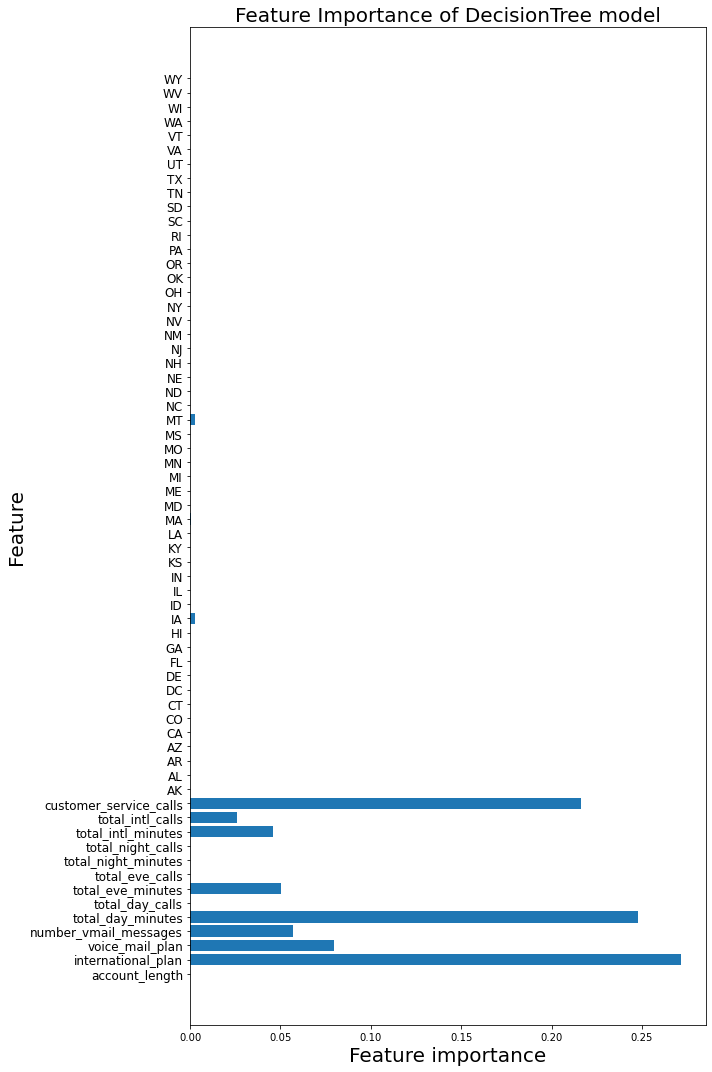

In [193]:
# It has 77 false negative, and out of all the predictions,
# 77/(2141+358) = 3.08% of predictions were false negatives, accuracy score is 91%, not bad
# Based on the classification model, let's take a look the importance of each feature
n_features = clf_dt.n_features_
plt.figure(figsize=(10, 15))
plt.barh(range(n_features), clf_dt.feature_importances_);
plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('Feature Importance of DecisionTree model', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/dtbasic_feat_import.png')

### It seems three features are the most important ones:
- customer_service_calls
- total_day_minutes 
- international_plan

In [194]:
# I have examined customer_service_calls and international_plan above. 
# Now examine total_day_minutes 
tdm = pd.DataFrame(df.groupby(['total_day_minutes'])['churn'].mean().sort_values(ascending = True))
tdm['churn'].value_counts()

0.000000    1221
1.000000     189
0.500000     130
0.333333      48
0.250000      47
0.200000      13
0.666667       8
0.166667       5
0.400000       4
0.285714       1
0.125000       1
Name: churn, dtype: int64

In [195]:
tdm.head()

,churn
total_day_minutes,
180.8,0.0
186.8,0.0
186.7,0.0
186.6,0.0
186.5,0.0


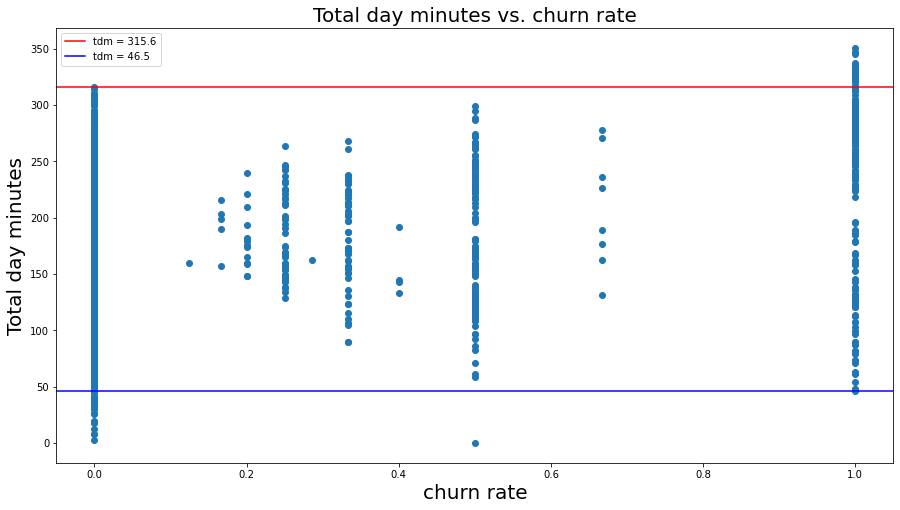

In [196]:
# total day minutes as a function of churn rate
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(tdm.churn,tdm.index)
plt.axhline(y=tdm[tdm['churn']==0].index.sort_values(ascending = True)[-1], xmin=0, xmax=1,c='red',
            label = "tdm = " +str(tdm[tdm['churn']==0].index.sort_values(ascending = True)[-1]))
plt.axhline(y=tdm[tdm['churn']==1].index.sort_values(ascending = True)[0], xmin=0, xmax=1,c='blue',
            label = "tdm = " +str(tdm[tdm['churn']==1].index.sort_values(ascending = True)[0]))
plt.xlabel('churn rate',fontsize=20)
plt.ylabel('Total day minutes', fontsize=20)
plt.title('Total day minutes vs. churn rate', fontsize=20)
plt.legend()
plt.savefig('figures/churnrate_totaldaymin.png')

# total day minutes > 315.6, churn rate is 100%, and total day minutes < 46.5, churn rate is mostly 0

## Classification Model Comparisons using different classifiers
- DecisonTreeClassifier()
- KNeighborsClassifier()
- RandomForestClassifier()
- AdaBoostClassifier()
- GradientBoostingClassifier()

In [197]:
# define a dataframe to save the metrics from different classification models
PerfDifClf = pd.DataFrame(columns=['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']) 
# DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth = 5, random_state = 10)
dt_cv_score = cross_val_score(clf_dt, X_train_scaled_bal, y_train_bal, cv=5)
mean_dt_cv_score = np.mean(dt_cv_score)
y_train_pred = clf_dt.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
PerfDifClf.loc['DecisionTreeCls_dft',
                       ['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']] = [
         round(mean_dt_cv_score,3),
         round(accuracy_score(y_train,y_train_pred),3),
         round(recall_score(y_train,y_train_pred),3),
         round(f1_score(y_train,y_train_pred),3),
         round(confusion_matrix(y_train,y_train_pred)[0,0]),
         round(confusion_matrix(y_train,y_train_pred)[0,1]),
         round(confusion_matrix(y_train,y_train_pred)[1,0]),
         round(confusion_matrix(y_train,y_train_pred)[1,1])]
# KNeighborsClassifier
clf_kn = KNeighborsClassifier()
kn_cv_score = cross_val_score(clf_kn, X_train_scaled_bal, y_train_bal, cv=5)
mean_kn_cv_score = np.mean(kn_cv_score)
y_train_pred = clf_kn.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
PerfDifClf.loc['KNeighborsCls_dft',
                       ['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']] = [
         round(mean_kn_cv_score,3),
         round(accuracy_score(y_train,y_train_pred),3),
         round(recall_score(y_train,y_train_pred),3),
         round(f1_score(y_train,y_train_pred),3),
         round(confusion_matrix(y_train,y_train_pred)[0,0]),
         round(confusion_matrix(y_train,y_train_pred)[0,1]),
         round(confusion_matrix(y_train,y_train_pred)[1,0]),
         round(confusion_matrix(y_train,y_train_pred)[1,1])]
# RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5)
rf_cv_score = cross_val_score(clf_rf, X_train_scaled_bal, y_train_bal, cv=5)
mean_rf_cv_score = np.mean(rf_cv_score)
y_train_pred = clf_rf.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
PerfDifClf.loc['RandomForestCls_dft',
                       ['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']] = [
         round(mean_rf_cv_score,3),
         round(accuracy_score(y_train,y_train_pred),3),
         round(recall_score(y_train,y_train_pred),3),
         round(f1_score(y_train,y_train_pred),3),
         round(confusion_matrix(y_train,y_train_pred)[0,0]),
         round(confusion_matrix(y_train,y_train_pred)[0,1]),
         round(confusion_matrix(y_train,y_train_pred)[1,0]),
         round(confusion_matrix(y_train,y_train_pred)[1,1])]
# AdaBoostClassifier()
clf_ab = AdaBoostClassifier()
ab_cv_score = cross_val_score(clf_ab, X_train_scaled_bal, y_train_bal, cv=5)
mean_ab_cv_score = np.mean(ab_cv_score)
y_train_pred = clf_ab.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
PerfDifClf.loc['AdaBoostCls_dft',
                       ['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']] = [
         round(mean_ab_cv_score,3),
         round(accuracy_score(y_train,y_train_pred),3),
         round(recall_score(y_train,y_train_pred),3),
         round(f1_score(y_train,y_train_pred),3),
         round(confusion_matrix(y_train,y_train_pred)[0,0]),
         round(confusion_matrix(y_train,y_train_pred)[0,1]),
         round(confusion_matrix(y_train,y_train_pred)[1,0]),
         round(confusion_matrix(y_train,y_train_pred)[1,1])]
#GradientBoostingClassifier()
clf_gb = GradientBoostingClassifier()
gb_cv_score = cross_val_score(clf_gb, X_train_scaled_bal, y_train_bal, cv=5)
mean_gb_cv_score = np.mean(gb_cv_score)
y_train_pred = clf_gb.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
PerfDifClf.loc['GradientBoostingCls_dft',
                       ['MeanCrsValScore','AccScore','RecallScore','F1','TN','FP','FN','TP']] = [
         round(mean_gb_cv_score,3),
         round(accuracy_score(y_train,y_train_pred),3),
         round(recall_score(y_train,y_train_pred),3),
         round(f1_score(y_train,y_train_pred),3),
         round(confusion_matrix(y_train,y_train_pred)[0,0]),
         round(confusion_matrix(y_train,y_train_pred)[0,1]),
         round(confusion_matrix(y_train,y_train_pred)[1,0]),
         round(confusion_matrix(y_train,y_train_pred)[1,1])]

In [198]:
# check the peformance from different classification models
PerfDifClf

,MeanCrsValScore,AccScore,RecallScore,F1,TN,FP,FN,TP
DecisionTreeCls_dft,0.865,0.911,0.782,0.716,1997,144,78,280
KNeighborsCls_dft,0.844,0.846,0.997,0.649,1756,385,1,357
RandomForestCls_dft,0.872,0.887,0.799,0.67,1931,210,72,286
AdaBoostCls_dft,0.874,0.871,0.637,0.585,1948,193,130,228
GradientBoostingCls_dft,0.915,0.948,0.804,0.816,2081,60,70,288


#### The GradientBoostingClassifier achieves the best results, So I will use this model in the following analysis

In [199]:
clf_gb = GradientBoostingClassifier()
gb_cv_score = cross_val_score(clf_gb, X_train_scaled_bal, y_train_bal, cv=5)
mean_gb_cv_score = np.mean(gb_cv_score)
y_train_pred = clf_gb.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
print('GradientBoostingClassifier:')
print(f"confusion matrix: \n {confusion_matrix(y_train,y_train_pred)}")
print(f"accuracy_score:  {round(accuracy_score(y_train,y_train_pred),3)}")
print(f"recall_score:  {round(recall_score(y_train,y_train_pred),3)}")
print(f"f1_score:  {round(f1_score(y_train,y_train_pred),3)}")

GradientBoostingClassifier:
confusion matrix: 
 [[2081   60]
 [  70  288]]
accuracy_score:  0.948
recall_score:  0.804
f1_score:  0.816


In [200]:
clf_gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [201]:
# With GridSearch to find the optimal parameters
param_grid = {
    "loss":["exponential", "deviance"],
    "learning_rate": [0.01,0.1,0.2],
    "min_samples_split": [2,5],
    "min_samples_leaf":[1,2,5],
    'max_depth':[3,5]
    }

# create gradient boost object for grid searching
clf_gbc = GradientBoostingClassifier(random_state = 42)

# create search object
gridsearch = GridSearchCV(estimator = clf_gbc, param_grid = param_grid, n_jobs = -1, cv = 3, scoring='recall')

# Train search object
gridsearch.fit(X_train_scaled_bal,y_train_bal)

# Get best estimator
print('Best parameters: \n\n',gridsearch.best_params_,'\n')

Best parameters: 

 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [202]:
gridsearch.cv_results_

{'mean_fit_time': array([1.81965105, 1.78065475, 1.9657917 , 1.91145436, 1.83692765,
        1.75585906, 2.59696158, 2.6048851 , 2.50787441, 2.42607975,
        2.51356395, 2.75125861, 2.03844992, 1.7971286 , 1.57378936,
        1.42814922, 1.44928106, 1.43583711, 2.22289936, 2.57953231,
        2.48876643, 2.58929404, 2.77870107, 2.68351579, 2.17121696,
        2.24919168, 2.17180848, 1.83710027, 1.94651612, 1.81847119,
        3.0583806 , 3.03412175, 2.89208142, 2.91799386, 2.73629252,
        2.9697868 , 1.80650139, 1.72637232, 1.70011234, 1.74185117,
        1.60558232, 1.80272826, 3.12873896, 3.29341102, 2.95468553,
        2.83617902, 2.63502407, 2.74396698, 1.75028197, 1.82084044,
        2.09084582, 1.95415433, 2.03886286, 1.94317484, 3.32780488,
        3.03350846, 3.04152211, 2.91530832, 2.76627032, 2.8992219 ,
        1.62925696, 1.90753269, 2.3682917 , 2.25583816, 1.73557138,
        1.8371129 , 2.72785322, 2.66712586, 3.06921681, 3.20786007,
        3.17376248, 2.59057411]

In [206]:
clf_gbcfinal = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', max_depth=5, 
                                        min_samples_split = 2, min_samples_leaf=1, random_state = 42)
y_train_pred = clf_gbcfinal.fit(X_train_scaled_bal,y_train_bal).predict(X_train_scaled)
print('GradientBoostingClassifier final:')
print(f"confusion matrix: \n {confusion_matrix(y_train,y_train_pred)}")
print(f"accuracy_score:  {round(accuracy_score(y_train,y_train_pred),3)}")
print(f"recall_score:  {round(recall_score(y_train,y_train_pred),3)}")
print(f"f1_score:  {round(f1_score(y_train,y_train_pred),3)}")

GradientBoostingClassifier final:
confusion matrix: 
 [[2135    6]
 [  40  318]]
accuracy_score:  0.982
recall_score:  0.888
f1_score:  0.933


##  this result is pretty good, so I will use it as the final model to do the test:
- Parameters:
-loss = 'deviance'
-learning_rate = 0.1
-min_samples_leaf = 1
-min_samples_split = 2
-max_depth = 5
-SMOTE balancing
-StandardScaler

In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state = 42)
X_train_scaled_bal,y_train_bal = smote.fit_resample(X_train_scaled,y_train)

clf_final = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.1, 
                                   min_samples_leaf= 5, min_samples_split= 5, 
                                   max_depth = 5, random_state = 42)
clf_final.fit(X_train_scaled_bal, y_train_bal)
print('Final model for train data:')
print(f"confusion matrix: \n {confusion_matrix(y_train,clf_final.predict(X_train_scaled))}")
print(f"accuracy_score:  {round(accuracy_score(y_train,clf_final.predict(X_train_scaled)),3)}")
print(f"recall_score:  {round(recall_score(y_train,clf_final.predict(X_train_scaled)),3)}")
print(f"f1_score:  {round(f1_score(y_train,clf_final.predict(X_train_scaled)),3)}\n")

print('Final model for test data:')
print(f"confusion matrix: \n {confusion_matrix(y_test,clf_final.predict(X_test_scaled))}")
print(f"accuracy_score:  {round(accuracy_score(y_test,clf_final.predict(X_test_scaled)),3)}")
print(f"recall_score:  {round(recall_score(y_test,clf_final.predict(X_test_scaled)),3)}")
print(f"f1_score:  {round(f1_score(y_test,clf_final.predict(X_test_scaled)),3)}\n")

Final model for train data:
confusion matrix: 
 [[2134    7]
 [  43  315]]
accuracy_score:  0.98
recall_score:  0.88
f1_score:  0.926

Final model for test data:
confusion matrix: 
 [[695  14]
 [ 33  92]]
accuracy_score:  0.944
recall_score:  0.736
f1_score:  0.797



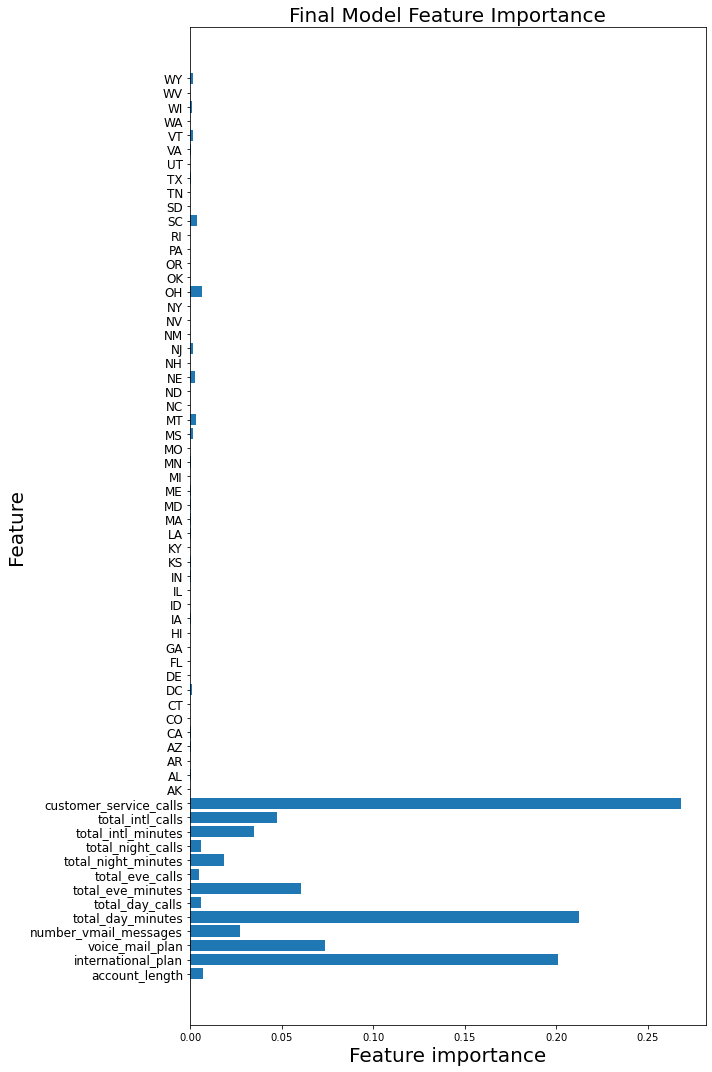

In [208]:
# Plot feature importance for the final model
n_features = clf_final.n_features_
plt.figure(figsize=(10, 15))
plt.barh(range(n_features), clf_final.feature_importances_);
plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 12) 
plt.xlabel('Feature importance', fontsize = 20)
plt.ylabel('Feature', fontsize = 20)
plt.title('Final Model Feature Importance', fontsize = 20)
plt.tight_layout()
plt.savefig('figures/clffinal_feat_import.png')

## Summary from the model
From the classification models, we found that three features affected the customer churn rate most significantly:
- customer_service_calls: The customers with large number of service calls as 4,5,6 seems have the larger churn rate
- international_plan: The customers with international plan have the higher churn rate
- total_day_minutes: The customers with the total day minutes > 315.6, churn rate is 100%, and total day minutes < 46.5, churn                        rate is mostly 0, therefore, the company need to deal with the customers with the total day minutes                            between 46.5 to 316 mins


Regarding states: AZ, AK and HI have the lowest churn rate states, therefore, need to pay more attention on customers from these states